In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
train_image_files_path = "../Data/dataset_image/"
valid_image_files_path = "../Data/Validation/"

In [3]:
# Đọc danh sách các thư mục trong đường dẫn train_image_files_path
label = [f for f in os.listdir(train_image_files_path) if os.path.isdir(os.path.join(train_image_files_path, f))]
# label.sort()
label

['Asian woolly-necked stork',
 'Edwards pheasant',
 'FISHING CAT (PRIONAILURUS VIVERRINUS)',
 'FIVE-BAR SWORDTAIL butterfly',
 'Green peafowl',
 'Hawksbill sea turtle',
 'Neofelis nebulosa',
 "SAUNDERS'S GULL (SAUNDERSILARUS SAUNDERSI)",
 'Smooth-coated otter',
 'WHALE SHARK']

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(
    rescale=1/255,
    # rotation_range=40,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # shear_range=0.2,
    # zoom_range=0.2,
    # horizontal_flip=True
)
validation_data_gen = ImageDataGenerator(
    rescale=1/255,
    # rotation_range=40,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # shear_range=0.2,
    # zoom_range=0.2,
    # horizontal_flip=True
)

In [5]:
train_generator = train_data_gen.flow_from_directory(
    train_image_files_path,
    target_size=(200, 200),
    class_mode='sparse'  # Use 'sparse' for integer labels
)

validation_generator = validation_data_gen.flow_from_directory(
    valid_image_files_path,
    target_size=(200, 200),
    class_mode='sparse'  # Use 'sparse' for integer labels
)

Found 3178 images belonging to 10 classes.
Found 845 images belonging to 10 classes.


In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
import tensorflow as tf
# Define the model
model = Sequential()

#CNN1
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(200,200,3)))
model.add(MaxPooling2D(2,2))

#CNN2
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

#CNN3
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

# Flatten the output
model.add(Flatten())
# Hidden layer
model.add(Dense(512, activation='relu'))
# Output layer
model.add(Dense(10, activation='softmax'))  # 9 classes, softmax for probabilities




In [7]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy
              metrics=['acc'])



In [8]:
# Train the model for 100 epochs, with 3 steps per epoch
EPOCHS = 100
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    steps_per_epoch=3,  # Set steps_per_epoch to 3
    validation_data=validation_generator
)


Epoch 1/100


3/3 [==============================] - 21s 9s/step - loss: 5.8396 - acc: 0.1875 - val_loss: 3.6684 - val_acc: 0.1183
Epoch 2/100
3/3 [==============================] - 13s 6s/step - loss: 2.5776 - acc: 0.2083 - val_loss: 2.3311 - val_acc: 0.1491
Epoch 3/100
3/3 [==============================] - 13s 6s/step - loss: 2.0873 - acc: 0.2917 - val_loss: 2.2637 - val_acc: 0.1396
Epoch 4/100
3/3 [==============================] - 14s 6s/step - loss: 1.8960 - acc: 0.2708 - val_loss: 2.3241 - val_acc: 0.2521
Epoch 5/100
3/3 [==============================] - 14s 7s/step - loss: 1.7284 - acc: 0.3750 - val_loss: 2.3690 - val_acc: 0.2994
Epoch 6/100
3/3 [==============================] - 14s 6s/step - loss: 1.5746 - acc: 0.4271 - val_loss: 2.6710 - val_acc: 0.1905
Epoch 7/100
3/3 [==============================] - 14s 6s/step - loss: 1.6601 - acc: 0.3646 - val_loss: 2.7607 - val_acc: 0.2769
Epoch 8/100
3/3 [==============================] - 14s 6s/step - loss: 1.5487 - acc: 0.4688 - v

In [9]:
# Lưu model sau khi huấn luyện
model.save("trained_animal_model.keras")

1/1 [==============================] - 0s 108ms/step


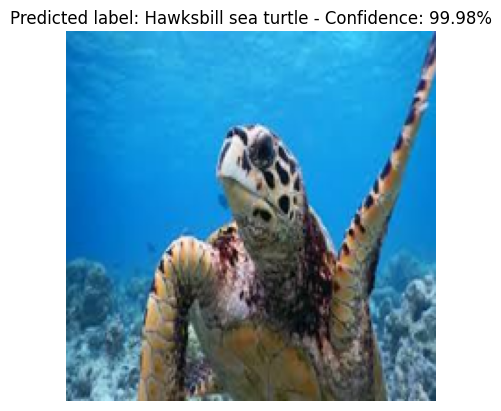

In [10]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Hàm dự đoán
def predict_image(image_path):
    # Load ảnh và chuyển đổi về đúng định dạng
    model = load_model("./trained_animal_model.keras")
    img = Image.open(image_path)
    img = img.resize((200, 200))
    img_array = np.array(img) / 255.0  # Rescale về 0-1

    # Thêm một chiều cho batch
    img_array = np.expand_dims(img_array, axis=0)

    # Dự đoán
    predictions = model.predict(img_array)
    predicted_label = label[np.argmax(predictions)]
    confidence = np.max(predictions) * 100  # Độ chính xác trong phần trăm

    # Hiển thị ảnh và kết quả dự đoán
    plt.imshow(img)
    plt.title(f'Predicted label: {predicted_label} - Confidence: {confidence:.2f}%')
    plt.axis('off')
    plt.show()

file_path = '../Data/Testing/Con_Rua.jpg'
predict_image(file_path)

